In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [52]:
learning_rate = 0.0005
epsilon = 1e-5
reg = 0.003

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

# x_norm = tf.

W1 = tf.Variable(tf.truncated_normal([784, 100]))
b1 = tf.Variable(tf.zeros([100]))

W2 = tf.Variable(tf.truncated_normal([100, 10]))
b2 = tf.Variable(tf.zeros([10]))

l1_out = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

# pred = tf.nn.softmax(l1_out)

pred = tf.nn.softmax(tf.matmul(l1_out, W2) + b2)

loss_noreg = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred+epsilon), reduction_indices=1))

loss = loss_noreg + reg*(tf.reduce_sum(tf.square(W1)) + tf.reduce_sum(tf.square(W2)))

optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

model_pred = tf.argmax(pred, 1)

correct_prediction = tf.equal(model_pred, tf.argmax(y,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [53]:
num_steps = 10000

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
# print "initial accuracy: ", acc

loss_history = []
validation_accuracy_history = []
training_accuracy_history = []

for step in range(num_steps):

    batch_xs, batch_ys = mnist.train.next_batch(100)

    prev1 =  sess.run([W1, b1])
    # prev2 = sess.run([W2, b2])

    out, _ = sess.run([pred, train], { x: batch_xs, y:batch_ys })

    # print "out: ", out[0]
    run_loss = sess.run([loss], { x: batch_xs, y:batch_ys })
    
    runv_acc = sess.run(accuracy, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
    runt_acc = sess.run(accuracy, feed_dict={x: batch_xs, y: batch_ys})
    
    if step%500 == 0:
        print "Iteration(",step,"/",num_steps,") loss: ", run_loss," train_accuracy: ",runt_acc," validation_accuracy: ",runv_acc
    
    loss_history.append(run_loss)
    validation_accuracy_history.append(runv_acc)
    training_accuracy_history.append(runt_acc)

    now1 = sess.run([W1, b1])
    # now2 = sess.run([W2, b2])

    # print now1[0] - prev1[0]
    # print now1[1] - prev1[1]
    # print now2[0] - prev2[0]

print "complete"

Iteration( 0 / 10000 ) loss:  [192.78955]  train_accuracy:  0.05  validation_accuracy:  0.0802
Iteration( 500 / 10000 ) loss:  [123.94632]  train_accuracy:  0.53  validation_accuracy:  0.5698
Iteration( 1000 / 10000 ) loss:  [80.04792]  train_accuracy:  0.69  validation_accuracy:  0.733
Iteration( 1500 / 10000 ) loss:  [50.283642]  train_accuracy:  0.85  validation_accuracy:  0.8202
Iteration( 2000 / 10000 ) loss:  [30.963058]  train_accuracy:  0.82  validation_accuracy:  0.8638
Iteration( 2500 / 10000 ) loss:  [18.295963]  train_accuracy:  0.86  validation_accuracy:  0.8908
Iteration( 3000 / 10000 ) loss:  [10.650974]  train_accuracy:  0.88  validation_accuracy:  0.9076
Iteration( 3500 / 10000 ) loss:  [5.8055711]  train_accuracy:  0.92  validation_accuracy:  0.9128
Iteration( 4000 / 10000 ) loss:  [3.2402599]  train_accuracy:  0.93  validation_accuracy:  0.9154
Iteration( 4500 / 10000 ) loss:  [1.9219609]  train_accuracy:  0.86  validation_accuracy:  0.912
Iteration( 5000 / 10000 ) l

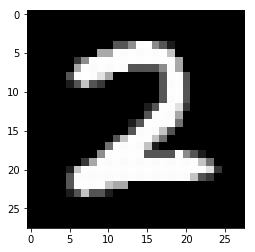

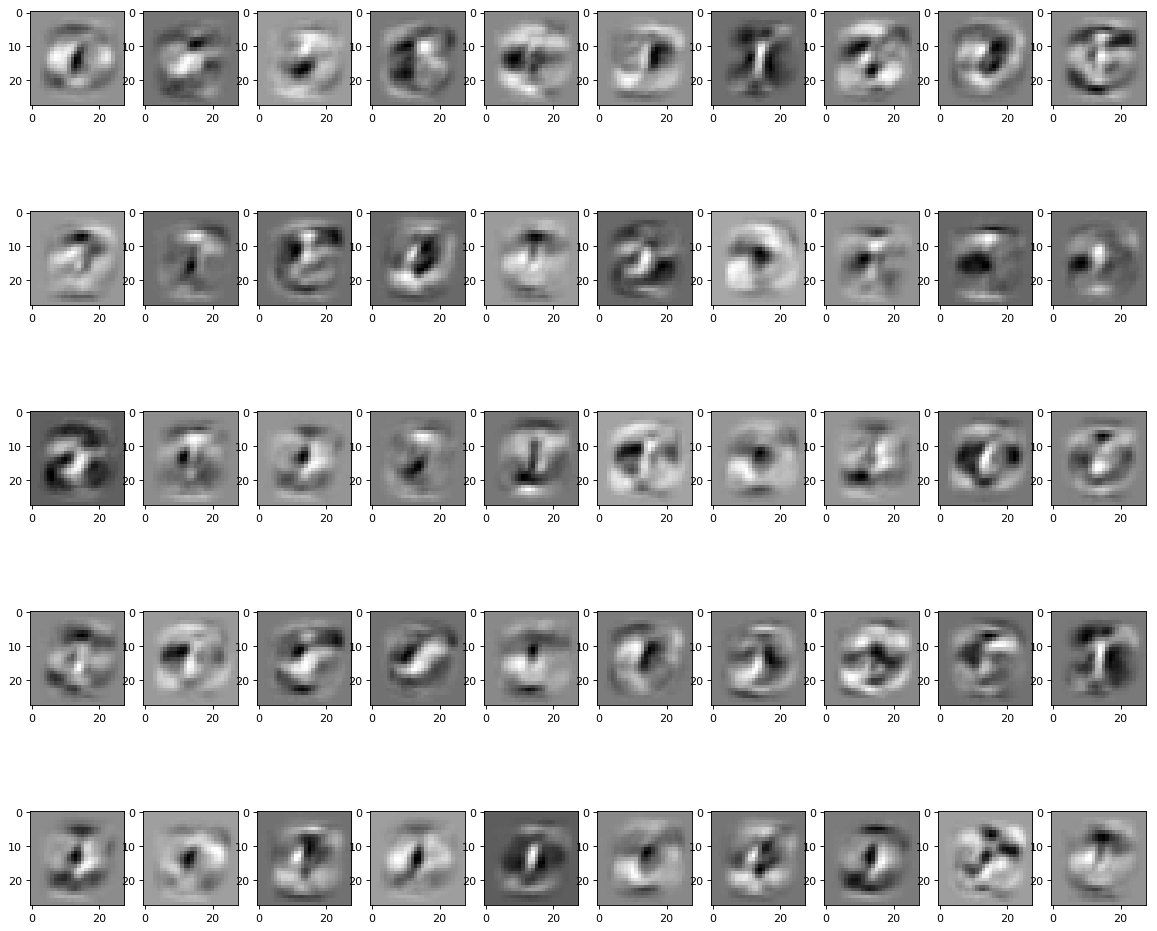

In [54]:
W2_final = sess.run([W2])
W1_final = sess.run([W1])

W1_final = np.reshape(W1_final, [28, 28, 100])

indices = range(50,100)

plt.imshow(mnist.train.images[0].reshape([28, 28]), cmap="gray")
plt.show()

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

for i in range(len(indices)):
    plt.subplot(5, 10, i+1)
    image = W1_final[:, :, indices[i]]
    image = 255*(image - np.min(image))/(np.max(image) - np.min(image))
    plt.imshow(image, cmap="gray")

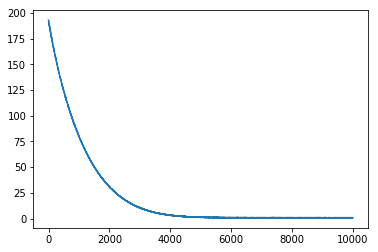

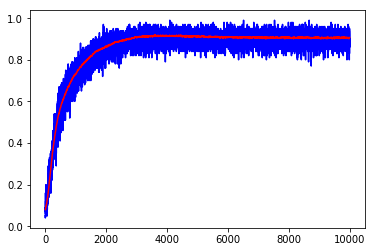

In [55]:
plt.plot(range(num_steps), loss_history)

plt.show()

plt.plot(range(num_steps), training_accuracy_history, color='b')
plt.plot(range(num_steps), validation_accuracy_history, color='r')

False
7
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


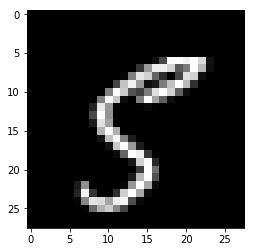

False
5
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


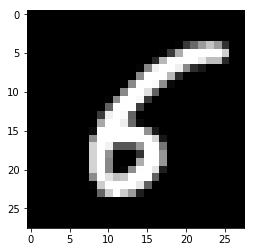

False
7
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


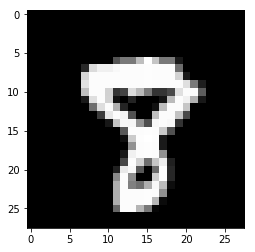

False
8
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


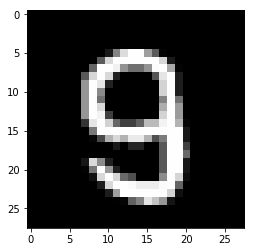

False
4
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


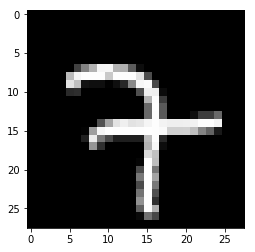

False
5
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


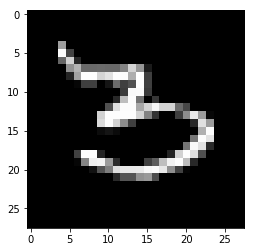

False
6
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


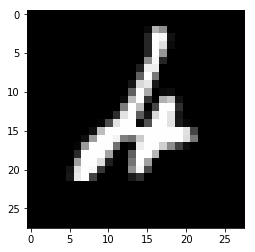

False
0
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


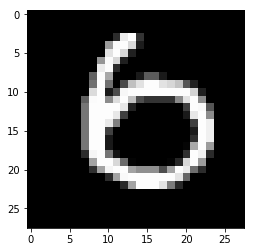

False
1
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


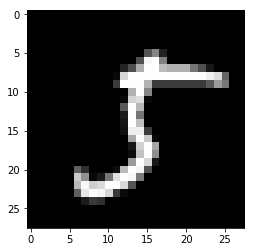

False
4
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


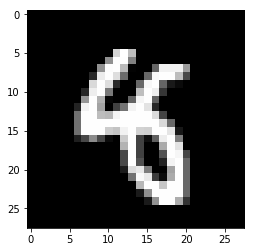

accuracy:  0.9064


In [64]:
mpred, simi, acc = sess.run([model_pred, correct_prediction, accuracy], feed_dict={x: mnist.test.images, y: mnist.test.labels})

test = np.array(mnist.test.images)

simi = simi

# test = test[0]

skip = 10
print_all = 10

for i in range(len(simi)):
    if not simi[i]:
        
        if skip >= 0:
            skip -= 1
            continue
            
        print simi[i]
        print mpred[i]
        print mnist.test.labels[i]
             
        image = np.reshape(test[i], [28, 28])
        
        plt.imshow(image, cmap="gray")
        plt.show()
        
        print_all -= 1
    
    if print_all <= 0:
        break


# print simi

print "accuracy: ",acc